# Sentiment Analysis RNN on Twitter Data

In [13]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Step 1: Load and preprocess the data
file = "Tweets.csv"
df = pd.read_csv(file)

# Extract necessary columns
df = df[['text', 'airline_sentiment']]

# Map sentiment labels to integers
df['airline_sentiment'] = df['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()  # Lowercase and strip whitespaces
    return text

df['text'] = df['text'].apply(clean_text)

In [4]:
# Split data into training and testing
X = df['text'].values
y = df['airline_sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Tokenization and padding
vocab_size = 10000
max_length = 100
embedding_dim = 50
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

In [6]:
# Function to build models
def build_model(recurrent_layer):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        recurrent_layer,
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
# Step 2: Build and train models
rnn_model = build_model(SimpleRNN(128))
lstm_model = build_model(LSTM(128))
gru_model = build_model(GRU(128))

C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [30]:
# Train and track history
rnn_history = rnn_model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=10, batch_size=16)

Epoch 1/10


732/732 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6458 - loss: 0.8618 - val_accuracy: 0.6592 - val_loss: 0.8439
Epoch 2/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6450 - loss: 0.8604 - val_accuracy: 0.6598 - val_loss: 0.8442
Epoch 3/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6398 - loss: 0.8647 - val_accuracy: 0.6592 - val_loss: 0.8437
Epoch 4/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6447 - loss: 0.8556 - val_accuracy: 0.6595 - val_loss: 0.8415
Epoch 5/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6461 - loss: 0.8565 - val_accuracy: 0.6571 - val_loss: 0.8485
Epoch 6/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6467 - loss: 0.8590 - val_accuracy: 0.6592 - val_loss: 0.8432
Epoch 7/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6443 - loss: 0.8558 - val_accuracy: 0.6581 - val_loss: 0.8439
Epoch 8/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6465 - loss: 0.8540 - val_accuracy: 0.658

In [31]:
lstm_history = lstm_model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=10, batch_size=32)

Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.6260 - loss: 0.9172 - val_accuracy: 0.6452 - val_loss: 0.8952
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.6270 - loss: 0.9159 - val_accuracy: 0.6452 - val_loss: 0.8967
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.6272 - loss: 0.9153 - val_accuracy: 0.6452 - val_loss: 0.8966
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.6285 - loss: 0.9142 - val_accuracy: 0.6452 - val_loss: 0.8954
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.6266 - loss: 0.9166 - val_accuracy: 0.6452 - val_loss: 0.8959
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.6273 - loss: 0.9159 - val_accuracy: 0.6452 - val_loss: 0.8962
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.6148 - loss: 0.9300 - val_accuracy: 0.6452 - val_loss: 0.8941
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.6164 - loss: 0.9295 - 

In [32]:
gru_history = gru_model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=10, batch_size=32)

Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6204 - loss: 0.9232 - val_accuracy: 0.6452 - val_loss: 0.8946
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6260 - loss: 0.9169 - val_accuracy: 0.6452 - val_loss: 0.8965
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6162 - loss: 0.9282 - val_accuracy: 0.6452 - val_loss: 0.8942
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.6286 - loss: 0.9140 - val_accuracy: 0.6452 - val_loss: 0.8951
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6230 - loss: 0.9204 - val_accuracy: 0.6452 - val_loss: 0.8955
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.6212 - loss: 0.9227 - val_accuracy: 0.6452 - val_loss: 0.8956
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.6226 - loss: 0.9214 - val_accuracy: 0.6452 - val_loss: 0.8957
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.6212 - loss: 0.9214 - 

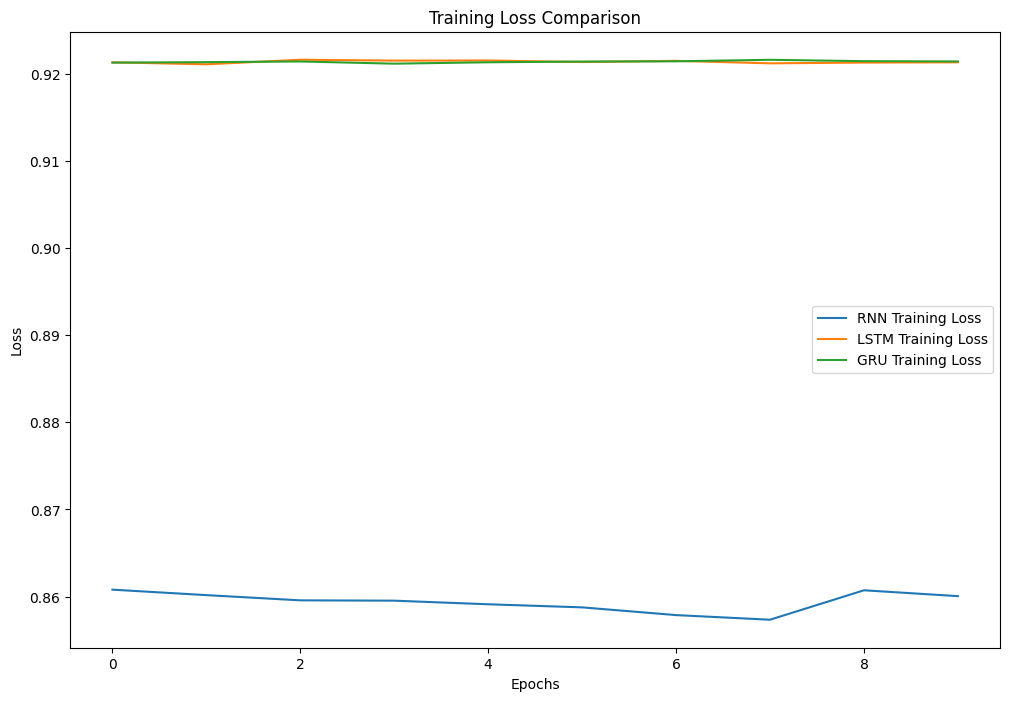

In [33]:
# Step 3: Plot training loss
plt.figure(figsize=(12, 8))
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Comparison')
plt.show()

In [34]:
# Step 4: Evaluate models on the test set
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nEvaluation for {model_name}:\n")
    print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))
    print(f"Accuracy: {accuracy:.4f}")

evaluate_model(rnn_model, X_test_padded, y_test, "RNN")
evaluate_model(lstm_model, X_test_padded, y_test, "LSTM")
evaluate_model(gru_model, X_test_padded, y_test, "GRU")


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Evaluation for RNN:

              precision    recall  f1-score   support

    negative       0.67      0.97      0.79      1889
     neutral       0.00      0.00      0.00       580
    positive       0.54      0.20      0.30       459

    accuracy                           0.66      2928
   macro avg       0.40      0.39      0.36      2928
weighted avg       0.51      0.66      0.56      2928

Accuracy: 0.6578
10/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

Evaluation for LSTM:

              precision    recall  f1-score   support

    negative       0.65      1.00      0.78      1889
     neutral       0.00      0.00      0.00       580
    positive       0.00      0.00      0.00       459

    accuracy                           0.65      2928
   macro avg       0.22      0.33      0.26      2928
weighted avg       0.42      0.65      0.51      2928

Accuracy: 0.6452
10/92 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

Evaluation for GRU:

              precision    recall  f1-score   support

    negative       0.65      1.00      0.78      1889
     neutral       0.00      0.00      0.00       580
    positive       0.00      0.00      0.00       459

    accuracy                           0.65      2928
   macro avg       0.22      0.33      0.26      2928
weighted avg       0.42      0.65      0.51      2928

Accuracy: 0.6452


C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i